<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

In [306]:
# Importing the TensorFlow library
import tensorflow as tf

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [307]:
tf1=tf.constant(99.99)
print(tf1)

tf.Tensor(99.99, shape=(), dtype=float32)


In [308]:
tf1.shape

TensorShape([])

In [309]:
tf1.ndim

0

### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [310]:
tf2=tf.constant([9,8,7,6,5])
print(tf2)

tf.Tensor([9 8 7 6 5], shape=(5,), dtype=int32)


In [311]:
tf2.shape # tensor has 5 elements

TensorShape([5])

In [312]:
tf2.ndim #1 dimensional tensor

1

### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [313]:
tf3=tf.add(tf2,7)

In [314]:
print(tf3)

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [315]:
tf4 = tf.constant([[1,2,3],[4,5,6]])
tf4.ndim

2

### Change the shape of the above created tensor to shape (3,2)

In [316]:
tf5 =tf.reshape(tf4,[3,2])

### Check the dtype, number of axes and the shape of tensor

In [317]:
tf5.dtype

tf.int32

In [318]:
tf5.shape

TensorShape([3, 2])

- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [319]:
import numpy as np
import pandas as pd
import tensorflow.keras.metrics

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Question 1

### Load the data
- Load the data, check the shape of data

In [320]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
cars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_data-1.csv')

In [322]:
cars.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [323]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [324]:
def convert_column(x):
  try:
    if type(x) == str:
      return float(x.split()[0])
    else:
      return x
  except:
    return np.nan

In [325]:
# For converting mileage, engine and max_power to numerical by extract numerical values from the strings
cars['mileage'] = cars['mileage'].map(convert_column)
cars['engine'] = cars['engine'].map(convert_column)
cars['max_power'] = cars['max_power'].map(convert_column)

In [326]:
# For Label Encode: 'owner' column
le = LabelEncoder()
cars['owner'] = le.fit_transform(cars['owner'])

In [327]:
# For One Hot Encode: 'fuel','seller_type','transmission' columns
ohe_cols = ['fuel','seller_type','transmission']
ohe = OneHotEncoder(drop='first', sparse=True, dtype=np.int64)
enc_vals = ohe.fit_transform(cars[ohe_cols])
ohe_df=pd.DataFrame(enc_vals.toarray())

In [328]:
cars = cars.join(ohe_df) # combine the OHE values into the main dataframe
cars.shape

(8128, 17)

In [329]:
cars.drop(ohe_cols, axis=1, inplace=True)
cars.shape

(8128, 14)

In [330]:
cars.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,0,1,2,3,4,5
0,2014,450000,145500,0,23.40,1248.0,74.00,5.0,1,0,0,1,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,1,0,0,1,0,1
2,2006,158000,140000,4,17.70,1497.0,78.00,5.0,0,0,1,1,0,1
3,2010,225000,127000,0,23.00,1396.0,90.00,5.0,1,0,0,1,0,1
4,2007,130000,120000,0,16.10,1298.0,88.20,5.0,0,0,1,1,0,1


In [331]:
cars.isna().sum()

year               0
selling_price      0
km_driven          0
owner              0
mileage          221
engine           221
max_power        216
seats            221
0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
dtype: int64

In [332]:
cars.dropna(inplace=True)

In [333]:
cars.isna().sum()

year             0
selling_price    0
km_driven        0
owner            0
mileage          0
engine           0
max_power        0
seats            0
0                0
1                0
2                0
3                0
4                0
5                0
dtype: int64

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [334]:
from sklearn.model_selection import train_test_split
cars.shape

(7906, 14)

In [335]:
X=cars.drop('selling_price',axis=1)
y = cars['selling_price']

In [336]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [337]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
X_train = se.fit_transform(X_train)
X_test = se.fit_transform(X_test)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [338]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, ReLU, Dropout
model = Sequential()
model.add(tf.keras.Input(shape=13))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='linear'))

### Check model summary and visualize the model

In [339]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 64)                896       
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_32 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)               

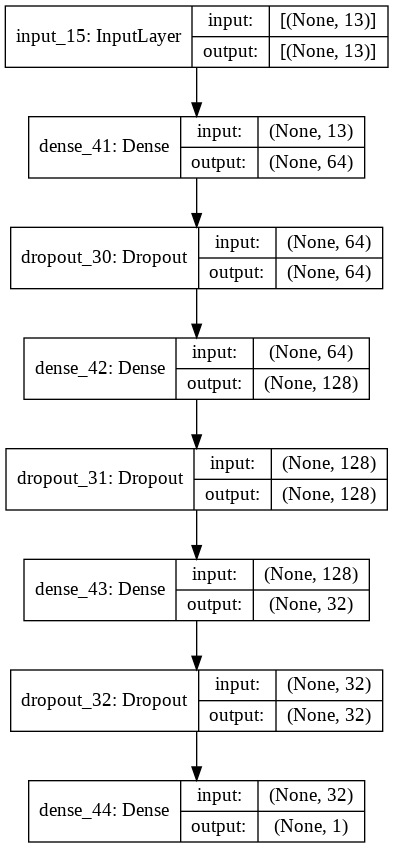

In [340]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [341]:
from keras import backend as K

In [342]:
def r_2_score(y_act,y_pred):
  ss_res = K.sum(K.square(y_act-y_pred))
  ss_tol = K.sum(K.square(y_act-K.mean(y_act)))
  r2_score = 1 - ss_res/(ss_tol + 0.0001)
  return r2_score

In [343]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=[r_2_score])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [344]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min', restore_best_weights=True,patience=10
)
history=model.fit(X_train,y_train,batch_size=32,epochs=1000,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/1000
186/186 [==============================] - 1s 4ms/step - loss: 658481.5565 - r_2_score: -1.1049 - val_loss: 645841.8125 - val_r_2_score: -1.1080
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 621009.2363 - r_2_score: -1.1875 - val_loss: 536977.9375 - val_r_2_score: -0.7050
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 481179.0483 - r_2_score: -0.5492 - val_loss: 335731.4375 - val_r_2_score: 0.1384
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 308529.6109 - r_2_score: 0.2494 - val_loss: 254695.2969 - val_r_2_score: 0.5001
Epoch 5/1000
186/186 [==============================] - 1s 3ms/step - loss: 251174.0541 - r_2_score: 0.5141 - val_loss: 221911.5625 - val_r_2_score: 0.6164
Epoch 6/1000
186/186 [==============================] - 1s 3ms/step - loss: 219429.0911 - r_2_score: 0.6341 - val_loss: 204016.7969 - val_r_2_score: 0.6749
Epoch 7/1000
186/186 [==============================] - 1s 

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [345]:
y_predict = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9284412657772156

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

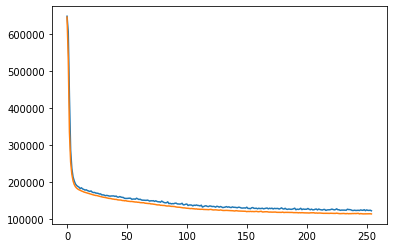

In [346]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.show()

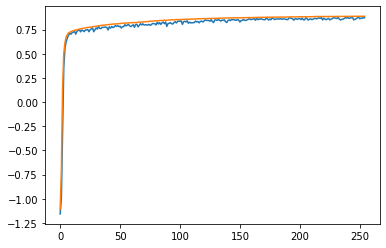

In [347]:
plt.plot(history.history['r_2_score'],label='Training R2 Score')
plt.plot(history.history['val_r_2_score'],label='Validation R2 Score')
plt.show()

##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [348]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, Dropout
from keras.layers.normalization import BatchNormalization

model2 = Sequential()
model2.add(tf.keras.Input(shape=13))
model2.add(BatchNormalization())
model2.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model2.add(Dropout(0.15))
model2.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model2.add(Dropout(0.10))
model2.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model2.add(Dropout(0.05))
model2.add(Dense(1, activation='linear'))

In [349]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 13)                52        
_________________________________________________________________
dense_45 (Dense)             (None, 64)                896       
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_35 (Dropout)         (None, 32)              

### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [350]:
model2.compile(optimizer='adam',loss='mean_absolute_error',metrics=[r_2_score])

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


In [351]:
history2=model2.fit(X_train,y_train,batch_size=16,epochs=1000,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/1000
371/371 [==============================] - 2s 4ms/step - loss: 639192.5109 - r_2_score: -1.6138 - val_loss: 380070.2500 - val_r_2_score: -0.0797
Epoch 2/1000
371/371 [==============================] - 1s 3ms/step - loss: 328413.0635 - r_2_score: 0.1618 - val_loss: 260877.1406 - val_r_2_score: 0.4425
Epoch 3/1000
371/371 [==============================] - 1s 3ms/step - loss: 286648.9808 - r_2_score: 0.3151 - val_loss: 236304.3594 - val_r_2_score: 0.5288
Epoch 4/1000
371/371 [==============================] - 1s 3ms/step - loss: 265110.8003 - r_2_score: 0.3131 - val_loss: 226760.4219 - val_r_2_score: 0.5642
Epoch 5/1000
371/371 [==============================] - 1s 3ms/step - loss: 247409.5894 - r_2_score: 0.3899 - val_loss: 220366.9844 - val_r_2_score: 0.5871
Epoch 6/1000
371/371 [==============================] - 1s 3ms/step - loss: 241837.9690 - r_2_score: 0.4157 - val_loss: 215195.5938 - val_r_2_score: 0.6025
Epoch 7/1000
371/371 [==============================] - 1s 3ms

### Check the R2 score on complete test data

In [352]:
y_predict = model2.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9013365747798742

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

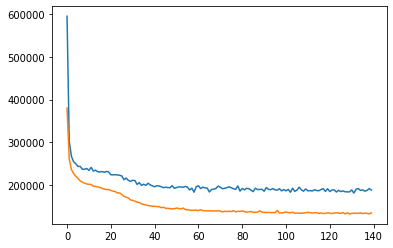

In [353]:
from matplotlib import pyplot as plt
plt.plot(history2.history['loss'],label='Training Loss')
plt.plot(history2.history['val_loss'],label='Validation Loss')
plt.show()

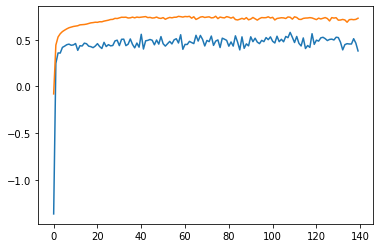

In [354]:
plt.plot(history2.history['r_2_score'],label='Training R2 Score')
plt.plot(history2.history['val_r_2_score'],label='Validation R2 Score')
plt.show()

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [355]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, Dropout
from keras.layers.normalization import BatchNormalization

initializer = tf.keras.initializers.HeUniform()

model3 = Sequential()
model3.add(tf.keras.Input(shape=13))
model3.add(BatchNormalization())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.20))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.10))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.05))
model3.add(Dense(1, activation='linear'))

### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

In [356]:
from keras.optimizers import Adam
model3.compile(optimizer=Adam(lr=0.002),loss='mse',metrics=[r_2_score])

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



In [357]:
history3=model3.fit(X_train,y_train,batch_size=64,epochs=1000,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/1000
93/93 [==============================] - 1s 5ms/step - loss: 1149471236270.2979 - r_2_score: -0.7742 - val_loss: 699379482624.0000 - val_r_2_score: -0.0422
Epoch 2/1000
93/93 [==============================] - 0s 4ms/step - loss: 368950660858.5532 - r_2_score: 0.4086 - val_loss: 217578504192.0000 - val_r_2_score: 0.6615
Epoch 3/1000
93/93 [==============================] - 0s 3ms/step - loss: 191334838010.5532 - r_2_score: 0.6271 - val_loss: 174818492416.0000 - val_r_2_score: 0.7084
Epoch 4/1000
93/93 [==============================] - 0s 3ms/step - loss: 205108935483.9149 - r_2_score: 0.5677 - val_loss: 154607583232.0000 - val_r_2_score: 0.7560
Epoch 5/1000
93/93 [==============================] - 0s 3ms/step - loss: 170974862488.5107 - r_2_score: 0.6636 - val_loss: 137700360192.0000 - val_r_2_score: 0.7835
Epoch 6/1000
93/93 [==============================] - 0s 4ms/step - loss: 137802771347.0638 - r_2_score: 0.6992 - val_loss: 116738777088.0000 - val_r_2_score: 0.7938
E

### Check the R2 score on complete test data

In [358]:
y_predict = model3.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9120050706272304

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

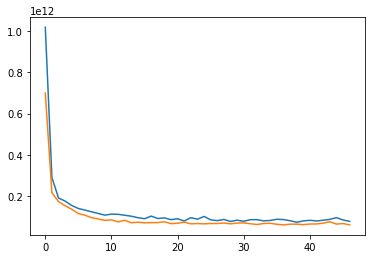

In [359]:
from matplotlib import pyplot as plt
plt.plot(history3.history['loss'],label='Training Loss')
plt.plot(history3.history['val_loss'],label='Validation Loss')
plt.show()

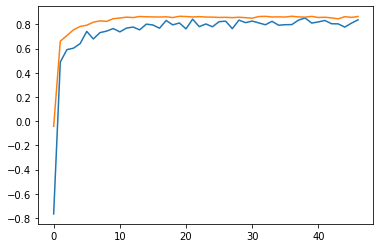

In [360]:
plt.plot(history3.history['r_2_score'],label='Training R2 Score')
plt.plot(history3.history['val_r_2_score'],label='Validation R2 Score')
plt.show()